In [1]:
import numpy as np
import os
import sys
from yaml import load
import csv

from IPython.display import Image, display
import PIL.Image
from cStringIO import StringIO

lib_dir = os.path.join(os.getcwd(), "..", "preprocessing")
sys.path.insert(0, lib_dir)

import librosa
import scipy
import audio
import graphic
from preprocessing_commons import apply_melfilter, generate_spectrograms, read_wav_dirty, sliding_audio, downsample

%matplotlib inline

In [2]:
config = load(open("../learning/config.yaml", "rb"))
csv_reader = csv.reader(open(config["train_data_dir"] ))

audio_files = [filename for (filename, label) in csv_reader]

In [3]:
def show_array(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

In [73]:
def create_spectrogram(signal, sample_rate):

    mel_image = apply_melfilter(signal, sample_rate, nfilt=40)
    mel_image = graphic.colormapping.to_grayscale(mel_image, bytes=True)

    mel_image_equalized = graphic.histeq.histeq(mel_image)
    return mel_image_equalized

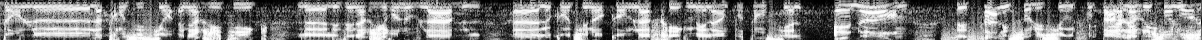

In [77]:
signal, sampling_rate = read_wav_dirty(audio_files[0])

spectrogram = create_spectrogram(signal, sampling_rate)
show_array(spectrogram)

In [36]:
signal_duration = len(signal) / sampling_rate # seconds

def split_signal():
    for i in range(0, signal_duration): # one second intervals
        signal_start = i*sampling_rate
        signal_chunk = signal[signal_start:signal_start+sampling_rate]
        show_array(create_spectrogram(signal_chunk, sampling_rate))

In [34]:
def split_images():
    image_chunk_length = spectrogram.shape[1] / signal_duration
    print(image_chunk_length,spectrogram.shape )
    for i in range(0, signal_duration): 
        image_start = i * image_chunk_length
        show_array(spectrogram[:,image_start:image_start + image_chunk_length,:])

In [78]:
%timeit split_signal
%timeit split_images

The slowest run took 136.45 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 25 ns per loop
10000000 loops, best of 3: 23.2 ns per loop


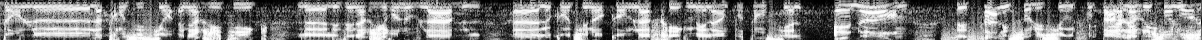

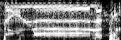

1792


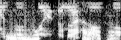

1870


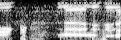

1815


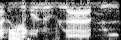

1852


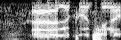

1797


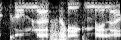

1839


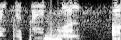

1832


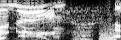

1846


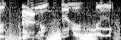

1826
(133, (40, 1202))


IndexError: too many indices for array

In [79]:
show_array(spectrogram)
split_signal()
split_images()

In [45]:
scipy.stats.describe(signal)

DescribeResult(nobs=159744, minmax=(-5931, 11373), mean=0.3985439202724359, variance=2872373.1176683889, skewness=0.553539486861663, kurtosis=1.5975142694056812)

17867


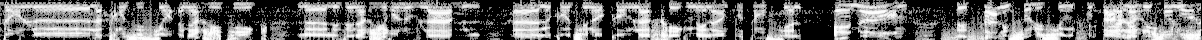

In [80]:
spectrogram_thresholded = spectrogram.copy()
spectrogram_thresholded[spectrogram < 100] = 0
print(len(spectrogram_thresholded[spectrogram < 100]))
show_array(spectrogram_thresholded)

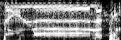

1792
133282550


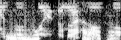

1870
99260056


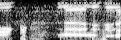

1815
103522806


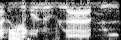

1852
115469011


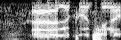

1797
103953820


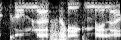

1839
108856076


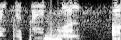

1832
78492403


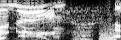

1846
116501489


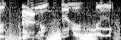

1826
112863904


In [88]:
from audioop import rms

for i in range(0, signal_duration): # one second intervals
    signal_start = i*sampling_rate
    signal_chunk = signal[signal_start:signal_start+sampling_rate]
    spectro = create_spectrogram(signal_chunk, sampling_rate)
    show_array(create_spectrogram(signal_chunk, sampling_rate))
    print(len(spectro[spectro < 100]))
    print(rms(signal_chunk, 4))
    

In [89]:
audio_files[0]

'/Users/therold/Uni/master-thesis/datasets/wav_segmented/french/france24/COP21_un_accord_ambitieux_estil_possible_.wav_105.wav'